Data Load လုပ်ခြင်းနှင့် Feature များ သီးခြားခွဲထုတ်ခြင်း

In [19]:
import pandas as pd

# Data Load
df = pd.read_csv("train.csv")

# Target
y = df['Survived']

# Feature Selection
X = df.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

Categorical Data ကို Numeric ပြောင်းခြင်း

In [20]:
# Categorical → Numeric
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

Missing Values ကို ဖြည့်ခြင်း

In [21]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

Data ကို အုပ်စုခွဲခြင်း

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Linear SVM Model တည်ဆောက်ခြင်းနှင့် Training

In [24]:
from sklearn.svm import SVC

linear_model = SVC(kernel='linear', C=2.0)
linear_model.fit(X_train, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",2.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


Model ၏ တိကျမှုကို စစ်ဆေးခြင်း

In [25]:
from sklearn.metrics import accuracy_score

y_pred = linear_model.predict(X_test)

print("--- Linear SVM Result (Titanic) ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")

--- Linear SVM Result (Titanic) ---
Accuracy Score: 78.21%


Feature Importance (Linear SVM Coefficients)

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

linear_importance = np.abs(linear_model.coef_[0])

feature_names = pd.get_dummies(
    df.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1),
    columns=['Sex', 'Embarked'],
    drop_first=True
).columns

feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': linear_importance
}).sort_values(by='Importance', ascending=False)

Visualization

C:\Users\PCLNV\AppData\Local\Temp\ipykernel_18192\2058056808.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


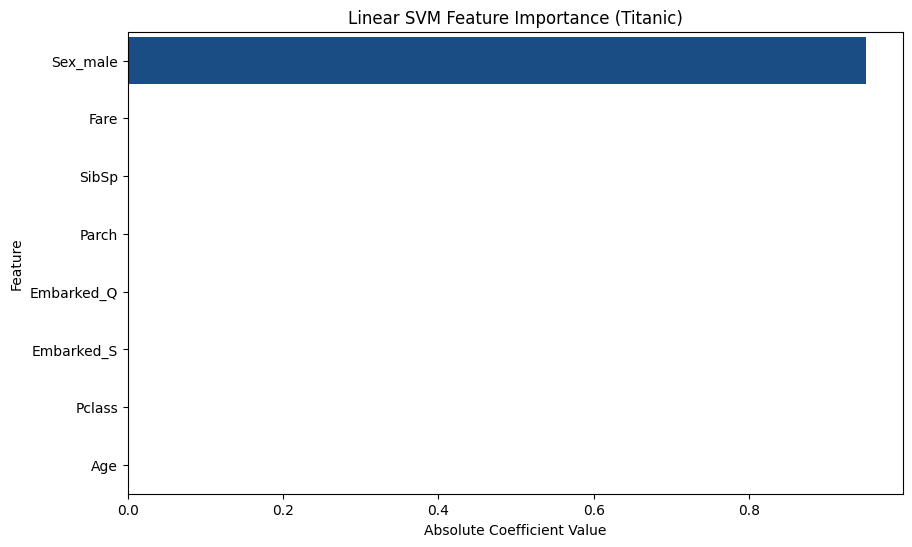

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feat_importance,
    palette='Blues_r'
)

plt.title('Linear SVM Feature Importance (Titanic)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

Feature Importance Table

In [28]:
print("--- Feature Importance Table ---")
print(feat_importance)

--- Feature Importance Table ---
      Feature  Importance
5    Sex_male    0.950150
4        Fare    0.000440
2       SibSp    0.000370
3       Parch    0.000152
6  Embarked_Q    0.000099
7  Embarked_S    0.000071
0      Pclass    0.000057
1         Age    0.000004


Visualization Data Preparation

In [29]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

X_vis = df[['Age', 'Fare']].fillna(df[['Age', 'Fare']].median()).values
y_vis = df['Survived'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vis)

model = SVC(kernel='linear', C=1.0)
model.fit(X_scaled, y_vis)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


Decision Boundary Grid ဖန်တီးခြင်း

In [31]:
h = 0.02
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

Decision Boundary & Support Vectors Plot

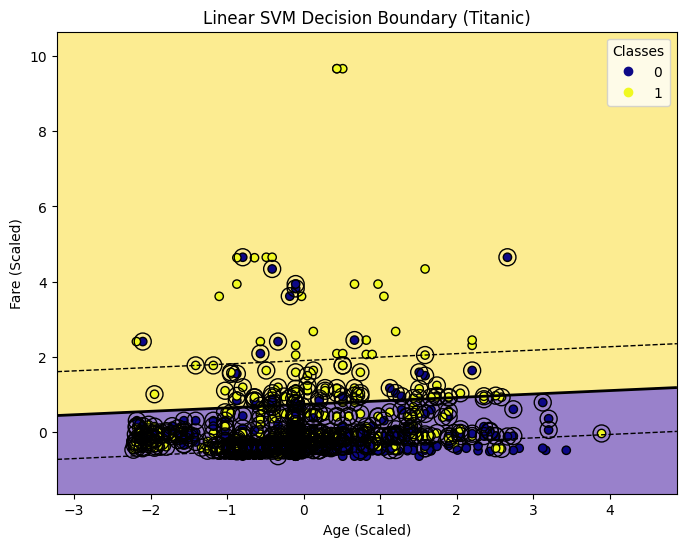

In [32]:
plt.figure(figsize=(8, 6))

# Decision regions
plt.contourf(xx, yy, Z, cmap='plasma', alpha=0.5)

# Decision boundary & margins
P = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contour(
    xx, yy, P,
    colors='black',
    levels=[-1, 0, 1],
    linestyles=['--', '-', '--'],
    linewidths=[1, 2, 1]
)

# Data points
scatter = plt.scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=y_vis,
    cmap='plasma',
    edgecolors='k'
)

# Support vectors
plt.scatter(
    model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    s=150,
    facecolors='none',
    edgecolors='black',
    label='Support Vectors'
)

plt.xlabel('Age (Scaled)')
plt.ylabel('Fare (Scaled)')
plt.title('Linear SVM Decision Boundary (Titanic)')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()